## Chronic Kidney Disease Classification


### Problem Statement

Chronic Kidney Disease (CKD) is a global health crisis characterised by high morbidity and the substantial economic burden of long-term dialysis and hospitalization. Early detection is critical, yet many cases remain undiagnosed until advanced stages. 

This project leverages machine learning to analyse clinical markers and patient data, aiming to identify the primary predictors of CKD. By establishing an evidence-based predictive framework, this study seeks to support clinical decision-making, enabling earlier diagnosis and timely intervention to improve patient outcomes.


### The Dataset

The dataset was obtained from Kaggle (“Synthetic Kidney Function Dataset – Generated by Arif (2025)”). This dataset is a synthetic but medically realistic collection of kidney-related health indicators to support machine-learning tasks. It simulates real-world patient data used by nephrologists to evaluate kidney function, detect early Chronic Kidney Disease (CKD), and assess risk factors.

https://www.kaggle.com/datasets/miadul/kidney-function-health-dataset

In [57]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset

In [60]:
kidney = pd.read_csv("kidney_dataset.csv")
kidney.head(10)

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,None,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0
5,0.712243,18.360351,95.790747,1742.261085,0,0,48.933196,122.531114,2.735247,ARB,0
6,5.115105,36.702973,29.982242,845.191506,0,1,51.283921,1122.938762,2.776777,ARB,1
7,5.654248,75.627081,5.905070,682.343581,1,1,45.824405,1796.981457,3.132385,ACE Inhibitor,1
8,2.874185,109.623087,36.955744,1199.330090,0,0,61.592718,1116.190230,1.612787,None,1
9,1.104140,11.793995,85.578023,2213.989276,1,0,61.747398,94.873882,2.594158,None,0


In [62]:
# Check null values and data types
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   Medication        5000 non-null   object 
 10  CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB


In [64]:
# Check for nulls
kidney.isnull().sum()

Creatinine          0
BUN                 0
GFR                 0
Urine_Output        0
Diabetes            0
Hypertension        0
Age                 0
Protein_in_Urine    0
Water_Intake        0
Medication          0
CKD_Status          0
dtype: int64

The dataset consists of 5000 observations and 11 columns (including target label "CKD_Status"). The numeric columns/features are:
* Creatinine (mg/dL)
* BUN (Blood Urea Nitrogen) (mg/dL)
* GFR (Glomerular Filtration Rate) (5–120) 
* Urine_Output (mL/day)
* Age
* Protein_in_Urine (mg/dL)
* Water_Intake (L/day)

The categorical features are:
* Diabetes (0 = No; 1 = Yes)
* Hypertension (0 = No; 1 = Yes)
* Medication (None, ACE Inhibitor, ARB, Diuretic)
* CKD_Status (CKD labels derived using standard clinical threshold: GFR < 60 = 1 (CKD), otherwise, 0 = Healthy)

No missing data.

In [67]:
# Check for duplicates
kidney.duplicated().sum()

0

### 1.a Split Data for Training and Testing

In [70]:
from sklearn.model_selection import train_test_split

# Stratified splitting due to imbalanced dataset
X = kidney.iloc[:,:-1]
y = kidney.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33, stratify = y, shuffle = True)

In [72]:
X_train.shape

(3500, 10)

In [74]:
y_train.shape

(3500,)

In [16]:
print("Original distribution:\n", pd.Series(y).value_counts(normalize=True))
print("\nTrain distribution:\n", pd.Series(y_train).value_counts(normalize=True))
print("\nTest distribution:\n", pd.Series(y_test).value_counts(normalize=True))

Original distribution:
 0    0.737
1    0.263
Name: CKD_Status, dtype: float64

Train distribution:
 0    0.736857
1    0.263143
Name: CKD_Status, dtype: float64

Test distribution:
 0    0.737333
1    0.262667
Name: CKD_Status, dtype: float64


In [17]:
# Convert categorical features to object for visualisation purposes

X_train["Diabetes"] = X_train["Diabetes"].astype("category")
X_train["Hypertension"] = X_train["Hypertension"].astype("category")
X_train["Medication"] = X_train["Medication"].astype("category")
y_train = y_train.astype("category")

In [18]:
# Save split datasets to csv files for model training

X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

### 2. Exploratory Data Analysis (EDA)

In [20]:
# Statistical summary

X_train.describe()

,Creatinine,BUN,GFR,Urine_Output,Age,Protein_in_Urine,Water_Intake
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1.995516,30.702919,73.356129,1663.753562,49.972176,535.468163,2.512950
std,2.031715,31.092383,31.903898,599.439566,14.424734,813.190930,0.870314
min,0.600040,7.007732,5.000000,400.502554,18.000000,50.049732,1.000810
25%,0.799801,11.285164,53.955775,1099.731412,40.294394,82.904188,1.738755
50%,1.006462,15.769620,89.738495,1815.441371,49.807632,119.711931,2.535226
75%,2.172568,40.731744,94.096246,2146.135635,59.575659,598.505982,3.293670
max,7.996428,119.860160,105.181746,2499.561082,90.000000,2997.724192,3.998043


The average age in the data is approximately 50 years. Most of the observations have healthy kidneys (CKD_Status = 0).

In [22]:
# Concatenate X_train and y_train for visualisation
df_train = pd.concat([X_train, y_train], axis=1)

# Check columns
df_train.columns

Index(['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Diabetes', 'Hypertension',
       'Age', 'Protein_in_Urine', 'Water_Intake', 'Medication', 'CKD_Status'],
      dtype='object')

In [23]:
df_train

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
925,1.034596,15.196403,92.841874,1845.240774,0,1,29.507025,94.214342,3.068842,None,0
2473,0.983484,12.385667,90.804051,2399.264935,1,0,41.519751,124.828837,2.678671,None,0
3834,1.142532,19.277844,88.647723,1659.363472,0,1,38.407494,59.013082,2.745201,ACE Inhibitor,0
1700,0.953365,10.762480,96.473027,2066.989684,1,0,18.000000,85.949465,2.116158,ACE Inhibitor,0
560,4.640157,92.867481,21.582155,1044.591961,1,0,38.743848,708.981874,1.855927,ARB,1
...,...,...,...,...,...,...,...,...,...,...,...
2452,0.829461,16.284259,95.189002,2403.602686,0,0,47.993309,124.508593,2.253015,ACE Inhibitor,0
3187,1.093303,13.864995,88.644685,1620.758381,0,1,49.357634,68.218699,1.117336,None,0
4867,7.064581,98.134575,5.000000,606.962730,0,0,52.853164,2511.202659,2.863584,ACE Inhibitor,1
2404,0.767564,16.187723,95.016224,1514.827476,0,0,53.581069,66.825727,1.156007,None,0


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 925 to 605
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Creatinine        3500 non-null   float64 
 1   BUN               3500 non-null   float64 
 2   GFR               3500 non-null   float64 
 3   Urine_Output      3500 non-null   float64 
 4   Diabetes          3500 non-null   category
 5   Hypertension      3500 non-null   category
 6   Age               3500 non-null   float64 
 7   Protein_in_Urine  3500 non-null   float64 
 8   Water_Intake      3500 non-null   float64 
 9   Medication        3500 non-null   category
 10  CKD_Status        3500 non-null   category
dtypes: category(4), float64(7)
memory usage: 233.0 KB


In [25]:
# Explore unique values in categorical features

print("Categories in Diabetes:", kidney["Diabetes"].unique())
print("Categories in Hypertension:", kidney["Hypertension"].unique())
print("Categories in Medication:", kidney["Medication"].unique())
print("Categories in CKD_Status:", kidney["CKD_Status"].unique())

Categories in Diabetes: [0 1]
Categories in Hypertension: [0 1]
Categories in Medication: ['None' 'ACE Inhibitor' 'Diuretic' 'ARB']
Categories in CKD_Status: [0 1]


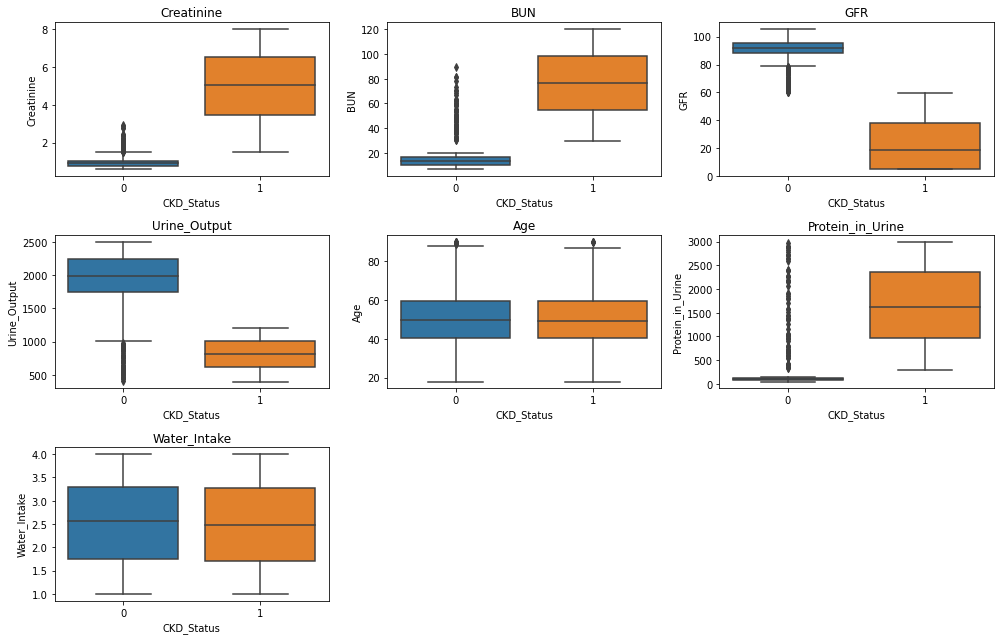

In [26]:
# Check for numerical relationships with target

import math

cols_num = ["Creatinine", "BUN", "GFR", "Urine_Output", "Age", "Protein_in_Urine", "Water_Intake"]
cols_cat = ["Diabetes", "Hypertension"]
target = ["CKD_Status"]

# Calculate layout: 3 columns, and enough rows for 7 plots
cols = 3
rows = math.ceil(len(cols_num)/cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, rows*rows))
axes = axes.flatten()

for i, feature in enumerate(cols_num):
    sns.boxplot(data=df_train, x=target[0], y=feature, ax=axes[i])
    axes[i].set_title(f'{feature}')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

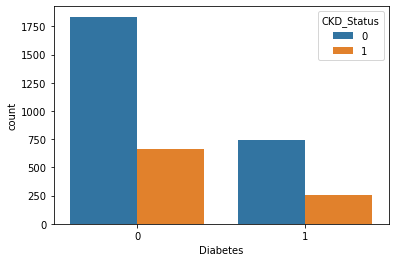

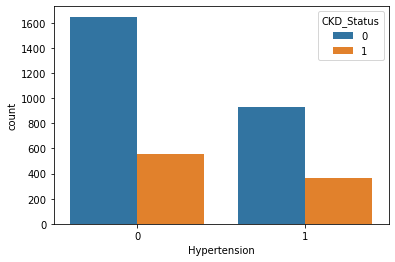

In [27]:
# Check categorical relationships with target
for feature in cols_cat:
    sns.countplot(data=df_train, x=feature, hue=target[0])
    plt.show()

Individuals with higher creatinine, BUN and protein in urine and individuals with lower GFR and urine output have a higher chance of having CKD. Age and water intake have similar distribution for both non-CKD and CKD individuals.

The target (CKD Status) is imbalanced with more healthy individuals than those with CKD. Comorbidities like hypertension and diabetes are linked to CKD.


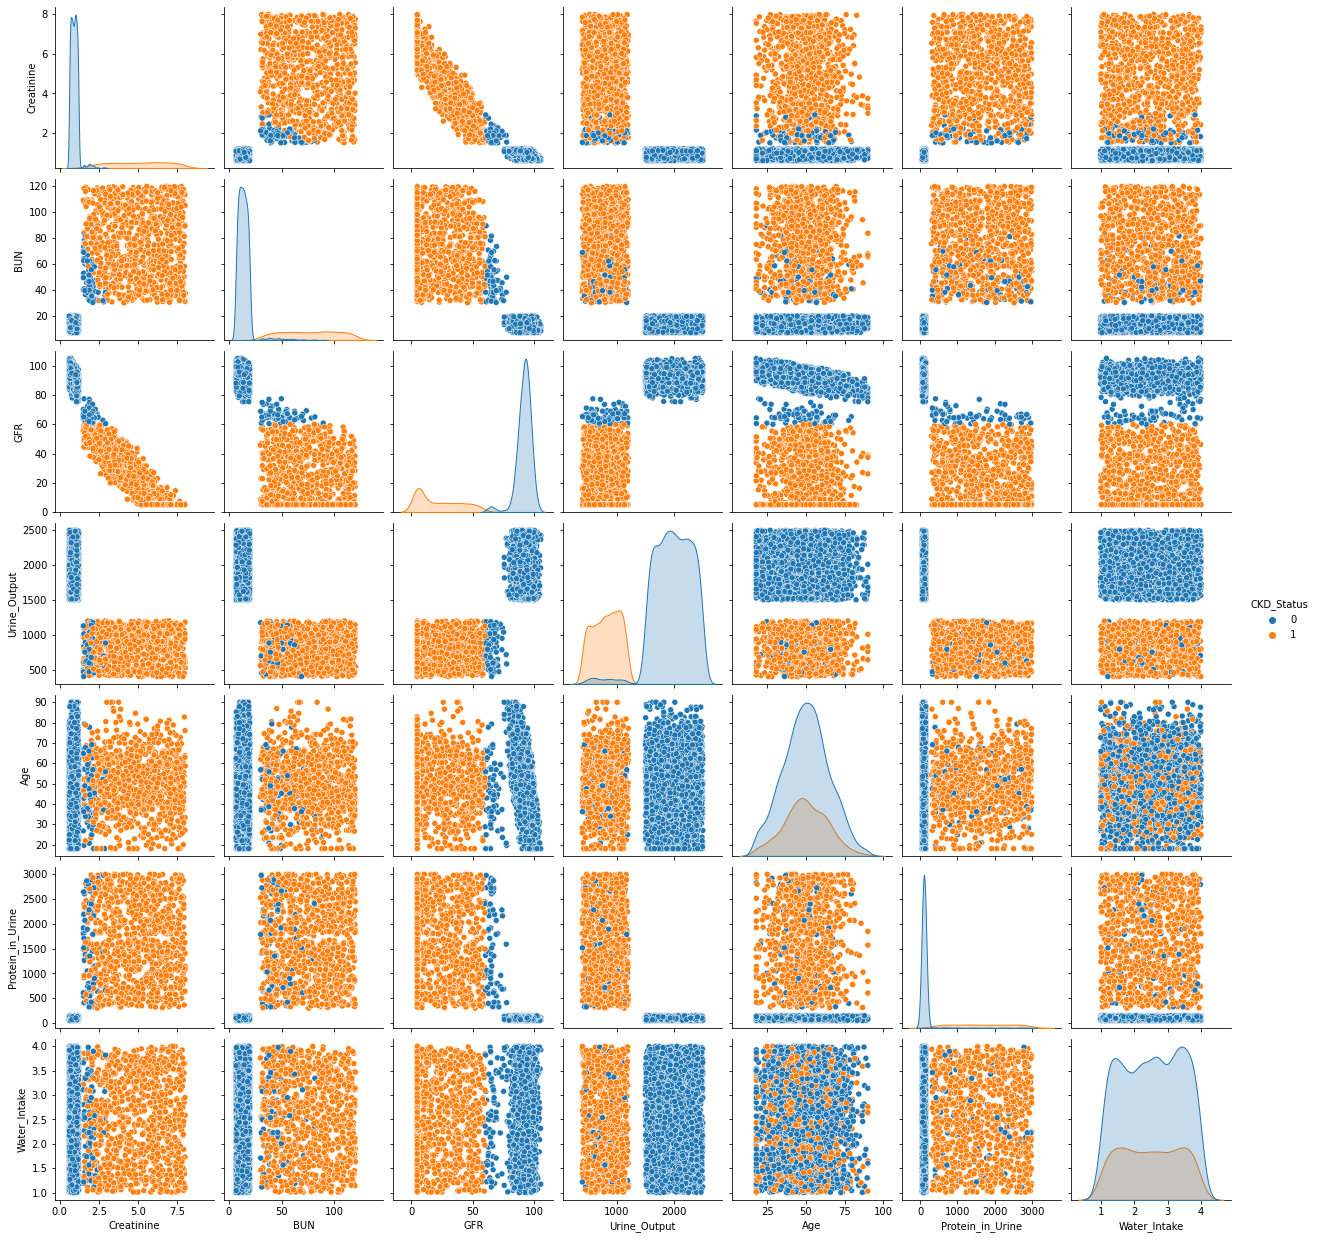

In [29]:
# Check relationship between features

sns.pairplot(data=df_train, hue='CKD_Status')
plt.show()

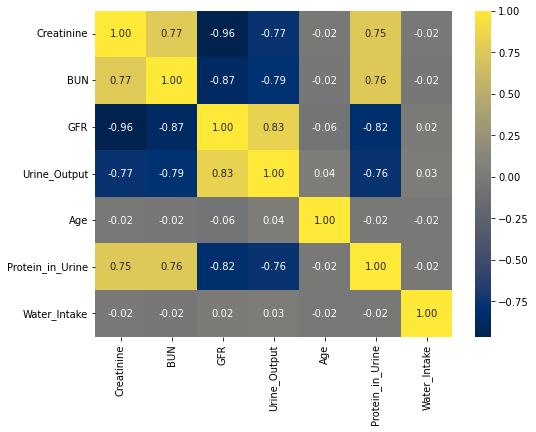

In [30]:
# Check correlation between numerical features

corr_matrix = df_train.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'cividis', fmt = '.2f')
plt.show()

There is a clear boundary between non-CKD and CKD individuals when relationship between feature-pairs are investigated. For example, higher creatine levels and lower GFRs are associated with CKD; higher urine output and higher GFR is common in non-CKD; and age is a factor in decreasing GFR in non-CKD individuals.

The findings above is supported by the correlation matrix with GFR and creatinine having a very strong negative relationships. Other fetaures with strong to very strong negative associations are: 
* creatinine and urine output,
* BUN and urine output,
* GFR and BUN,
* protein in urine and GFR,
* protein in urine and urine output.

Features with strong to very strong positive associations are:
* BUN and creatinine,
* BUN and protein in urine,
* urine output and GFR.

These associations are consistent with CKD diagnosis (https://www.cdc.gov/kidney-disease/index.html). CKD status was determined by GFR values of <60. KDIGO outlines varying levels of CKD and inclusion of albumin or protein in urine aside from GFR (https://kdigo.org/wp-content/uploads/2024/03/KDIGO-2024-CKD-Guideline.pdf).
